In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap



In [6]:

df = pd.read_csv("C:/Users/hp5cd/Downloads/iris.csv")



In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [8]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [11]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


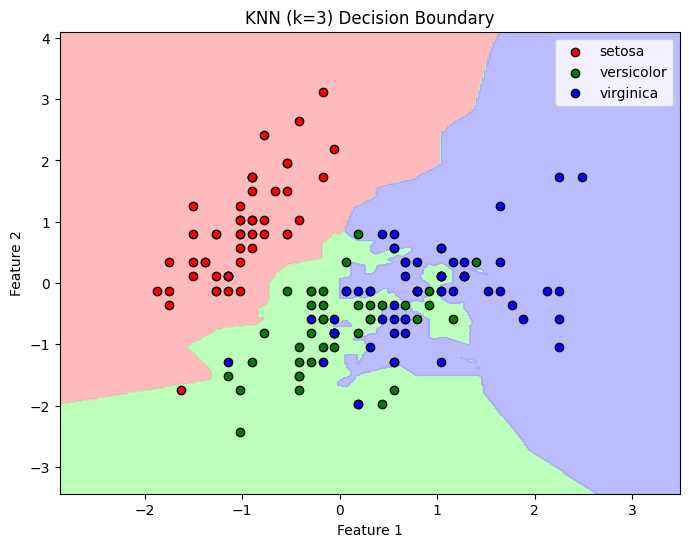

In [14]:
def plot_decision_boundary(X, y, k):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    for idx, color in zip(np.unique(y), cmap_bold):
        plt.scatter(X[y == idx, 0], X[y == idx, 1], c=color, label=le.inverse_transform([idx])[0], edgecolor='k')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"KNN (k={k}) Decision Boundary")
    plt.legend()
    plt.show()

plot_decision_boundary(X_scaled[:, :2], y_encoded, k)